## Handwrtten Digits Identification with MNIST Database

Task: Train a module to identify the handwrtten digits

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import joblib

### Read MNIST Dataset Class from kaggle

### 1.Data Loading

In [2]:
#as_frame is True RETURN DataFrame, it is False RETURN Numpy Array 
imgdata = fetch_openml("mnist_784",as_frame=False)



### Glance the data

In [3]:
print(imgdata.keys())
#print(imgdata.frame.info())

print(f"feature_names: {imgdata.feature_names}")
print(f"feature_names: {imgdata.target_names}")

print(f"Number of data: {len(imgdata.data)}")
print(f"Number of label: {len(imgdata.target)}")

print(f"Number of feature: {len(imgdata.feature_names)}")
print(f"Number of Target: {len(imgdata.target_names)}")


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
feature_names: ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 

In [4]:

# Convert features into a Pandas DataFrame
df = pd.DataFrame(imgdata.data, columns=imgdata.feature_names)


# Compute statistics for each feature
feature_stats = df.agg(['mean', 'max', 'min', 'median']).T.sort_values("median",ascending=False)
print(feature_stats)

# Save 5000 data to csv
#df[].to_csv('output.csv', index=False)  # index=False prevents writing row numbers
print("CSV saved as 'output.csv'")

                mean    max  min  median
pixel408  140.015057  255.0  0.0   173.0
pixel436  139.657671  255.0  0.0   171.0
pixel435  136.040529  255.0  0.0   168.0
pixel409  137.569329  255.0  0.0   166.0
pixel212  135.574757  255.0  0.0   156.0
...              ...    ...  ...     ...
pixel273   76.699757  255.0  0.0     0.0
pixel274   52.233757  255.0  0.0     0.0
pixel275   31.094671  255.0  0.0     0.0
pixel276   15.239414  255.0  0.0     0.0
pixel784    0.000000    0.0  0.0     0.0

[784 rows x 4 columns]
CSV saved as 'output.csv'


### 2.Data Normalization


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Create MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the data
X_normalized = scaler.fit_transform(imgdata.data)

## Features reduction with PCA

In [6]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% variance
pca = PCA(n_components=0.95)

# Fit PCA to the data and transform it
X_reduced = pca.fit_transform(X_normalized)

# Print the reduced shape
print("Original shape:", X_normalized.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (70000, 784)
Reduced shape: (70000, 154)


#### Split training set and testing set

In [7]:
from sklearn.model_selection import train_test_split

X = X_reduced # use the X_reduced feature with PCA
y = imgdata.target

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.142, random_state=42)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

print(X_train[0],  '(' + y_train[0] + ')')

Training Set: 60060 rows
Test Set: 9940 rows
[ 3.33063668 -0.1251252  -4.58006108  2.2720981  -1.01822516 -0.74133962
 -0.59179388  2.51145806  0.65431177 -0.37672884 -0.88460779 -0.51854485
  1.52363315  0.64856792 -0.11805746 -0.48547476  0.41858906  0.31620295
  1.45059935  0.24450781 -0.50116584  0.55183223 -1.18813442 -0.40102459
 -0.74793353 -0.09863574  0.4182659  -0.53573015 -0.76891586 -0.76307592
  0.11397542  0.06533452 -0.96692683  0.33784554 -0.97977654  0.11318349
  0.04773517 -1.00308157  0.18347917  0.07130961  0.40948043  0.11989198
  0.47763481  1.066529    0.32346517  0.04781582 -0.17306055  0.17413925
  0.13959374  0.35956526 -0.08442719  0.55130698  0.3388209  -0.07024481
 -0.30098183  0.60688505 -0.01110164  0.10608921 -0.21924685  0.09946513
 -0.23139473  0.04086671 -0.02398319  0.10352302  0.144996    0.44305496
  0.04670367  0.06505246 -0.0751629   0.1399696   0.10803582 -0.36010242
  0.33855417  0.26111324 -0.73165399 -0.0905272   0.02946377 -0.27273995
 -0.14

### 3. Data Visualization:

In [8]:
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1


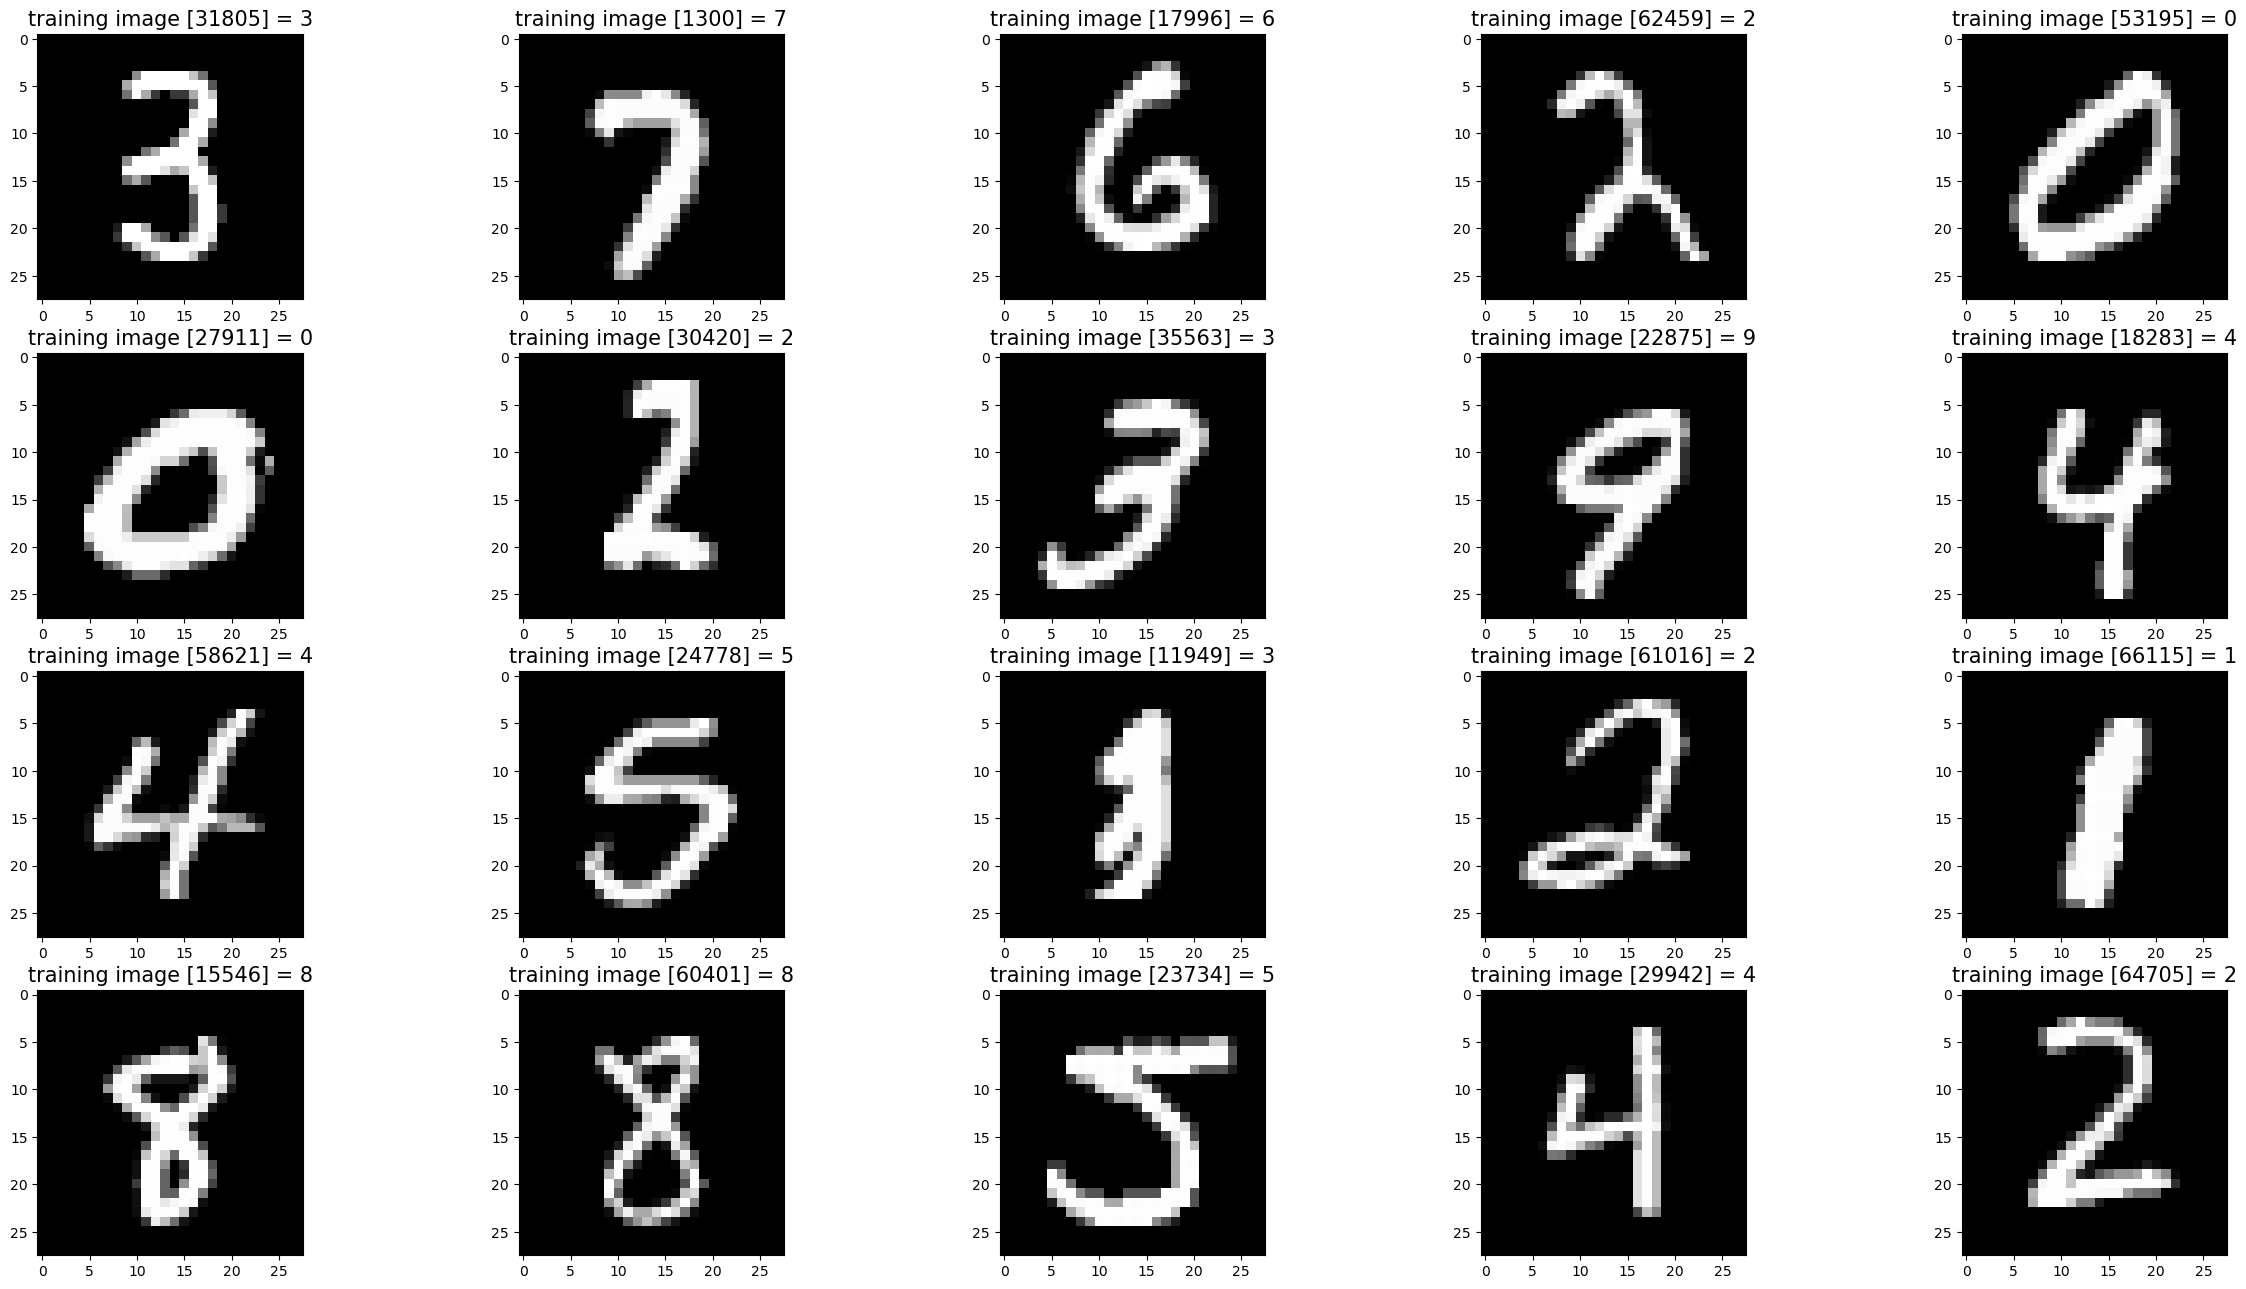

In [9]:
import random

#
# Show some random training and test images 
#
images_show = []
titles_show = []
for i in range(0, 20):
    r = random.randint(1, len(imgdata.data))
    images_show.append(imgdata.data[r].reshape(28,28))
    titles_show.append('training image [' + str(r) + '] = ' + str(imgdata.target[r]))    


show_images(images_show, titles_show)


## Data explortation

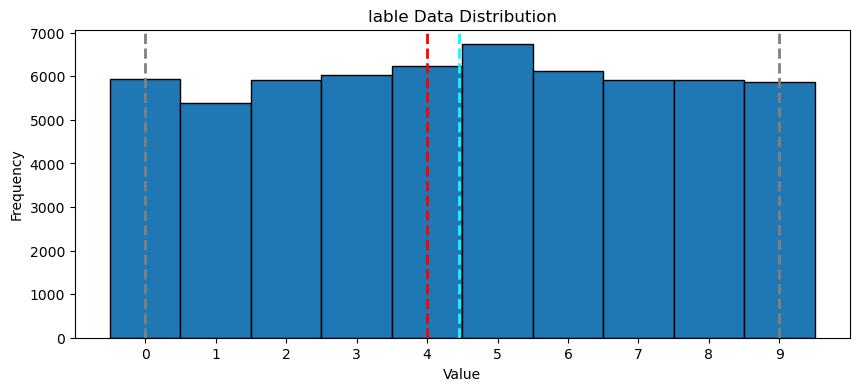

In [10]:
# Create a Figure
fig = plt.figure(figsize=(10,4))
y_train_numeric = y_train.astype(int)

# Plot a histogram
#plt.hist(y_train)
plt.hist(y_train, bins=range(min(y_train_numeric), max(y_train_numeric) + 2), align='left', edgecolor='black')


# Get statistics
min_val = min(y_train_numeric)
max_val = max(y_train_numeric)
mean_val = y_train_numeric.mean()
med_val = np.median(y_train_numeric)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)


# Add titles and labels
plt.title('lable Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')


# Ensure x-axis is in ascending order with integer ticks
sorted_values = sorted(set(y_train_numeric))  # Get unique sorted values
plt.xticks(sorted_values, sorted_values)

# Add legend
#plt.legend()

# Show the figure
plt.show()

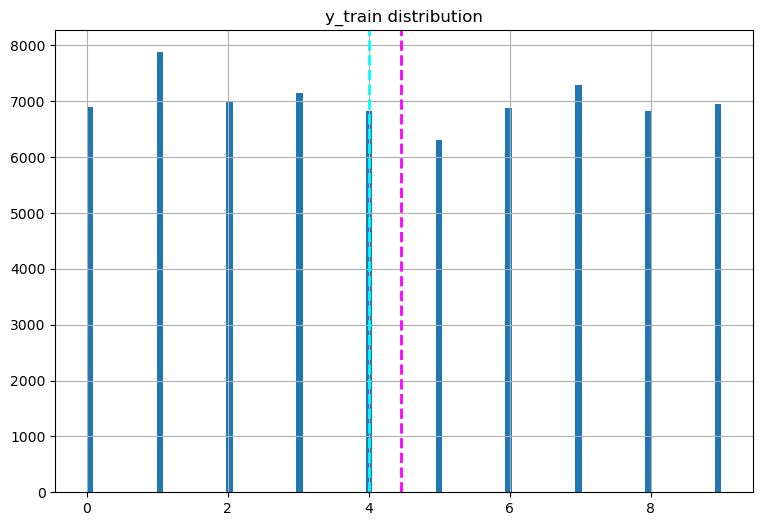

In [11]:
# numeric_features = y_train
# # Plot a histogram for each numeric feature
# for col in numeric_features:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = pd.Series(imgdata.target.astype(int))
feature.hist(bins=100, ax = ax)
ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
ax.set_title("y_train distribution")
plt.show()

## Start Tensorflow Setup

In [12]:
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))



Training Set: 60060 rows
Test Set: 9940 rows


### Import tensorflow

In [13]:
import tensorflow
from tensorflow import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras import utils
from keras import optimizers

# Set random seed for reproducability
tensorflow.random.set_seed(15)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)



Libraries imported.
Keras version: 2.10.0
TensorFlow version: 2.10.0


## Prepare the data for TensorFlow


In [14]:
# Set data types for float features
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Set data types for categorical labels
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('Ready...')
print(y_test[0])

Ready...
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Define a neural network

In [15]:
len(y_test[0])

10

In [16]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes
num_hidden_layers = 4 # Number of hidden layer nodes
#keras.backend.clear_session()

model = Sequential()



model.add(Dense(hl, input_dim=len(X_train[0]), activation='relu'))
for i in range(1, num_hidden_layers +1):
    model.add(Dense(hl, input_dim=hl, activation='relu'))

model.add(Dense(len(y_test[0]), input_dim=hl, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1550      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 2,100
Trainable params: 2,100
Non-trainabl

## Train the model


In [17]:
print(len(X_train[:1][0]))
print(len(y_train[:1][0]))
print(len(X_test[:1][0]))
print(len(y_test[:1]))


print((y_train[:1]))


154
10
154
1
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [39]:
#hyper-parameters for optimizer
learning_rate = 0.01
opt = optimizers.Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
batch_size = 16 # 2, 4, 8, 16 ,32


history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/50
3754/3754 [==============================] - 1s 337us/step - loss: 0.3127 - accuracy: 0.9119 - val_loss: 0.3587 - val_accuracy: 0.9065
Epoch 2/50
3754/3754 [==============================] - 1s 310us/step - loss: 0.3029 - accuracy: 0.9177 - val_loss: 0.3009 - val_accuracy: 0.9233
Epoch 3/50
3754/3754 [==============================] - 1s 360us/step - loss: 0.2948 - accuracy: 0.9224 - val_loss: 0.3226 - val_accuracy: 0.9141
Epoch 4/50
3754/3754 [==============================] - 1s 315us/step - loss: 0.2906 - accuracy: 0.9238 - val_loss: 0.3284 - val_accuracy: 0.9133
Epoch 5/50
3754/3754 [==============================] - 1s 324us/step - loss: 0.2955 - accuracy: 0.9235 - val_loss: 0.2947 - val_accuracy: 0.9249
Epoch 6/50
3754/3754 [==============================] - 1s 350us/step - loss: 0.2864 - accuracy: 0.9253 - val_loss: 0.2984 - val_accuracy: 0.9242
Epoch 7/50
3754/3754 [==============================] - 1s 316us/step - loss: 0.2869 - accuracy: 0.9250 - val_loss: 0.2959 -

## Review training and validation loss


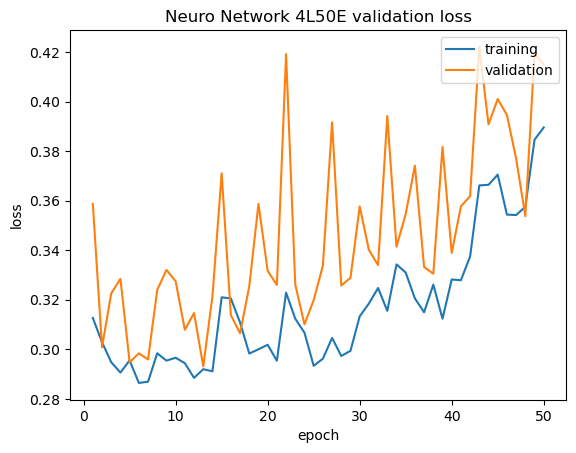

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Neuro Network 4L50E validation loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [20]:
import joblib
#
# Save model
#

model_file = 'P01 - DL 4L_50E model_file.pkl'
#
# Becareful for overwriting the model file
#

# # binary model file
joblib.dump(model, model_file) 

INFO:tensorflow:Assets written to: ram://5eb514d0-75fa-442d-8db7-139326d10767/assets


['P01 - DL 4L_50E model_file.pkl']

### Load model

In [41]:
model_file = 'P01 - DL 4L_50E model_file.pkl'


In [22]:
# Load the model from the file
model = joblib.load(model_file)

### Perdict

In [42]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Get predictions from test data
predictions = np.argmax(model.predict(X_test), axis=1)

311/311 [==============================] - 0s 214us/step


In [43]:
# Tensorflow doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(X_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)



311/311 [==============================] - 0s 226us/step


In [25]:
predictions

array([8, 4, 8, ..., 0, 5, 2])

## Evaluate model performance


Overall Accuracy: 0.9007042253521127
Overall Precision: 0.9018222772567295
Overall Recall: 0.9004881541775198


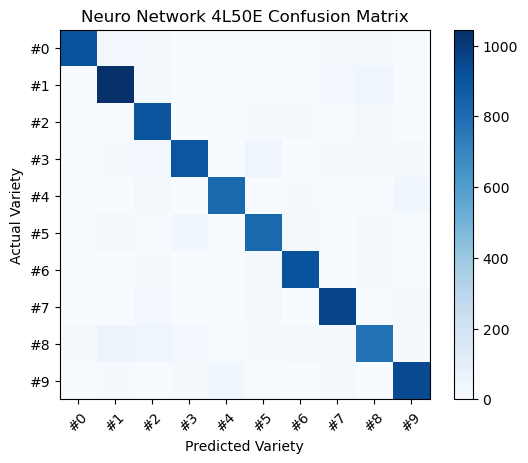

In [44]:
# Get metrics
print("Overall Accuracy:",accuracy_score(true_labels, predictions))
print("Overall Precision:",precision_score(true_labels, predictions, average='macro'))
print("Overall Recall:",recall_score(true_labels, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(true_labels, predictions)
classes = ['#0','#1','#2','#3','#4','#5','#6','#7','#8','#9']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Neuro Network 4L50E Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

## ROC / AUC 

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score

probabilities = class_probabilities
auc = roc_auc_score(y_test,class_probabilities, multi_class='ovr')
print('Average AUC:', auc)


Average AUC: 0.9966197702951403


In [28]:
probabilities

array([[4.2597964e-04, 1.4187268e-04, 4.8433649e-04, ..., 9.0472902e-05,
        9.9783164e-01, 2.7413075e-04],
       [3.3673024e-04, 3.9478887e-06, 7.8959961e-04, ..., 7.7461061e-04,
        1.2873360e-07, 2.0112420e-05],
       [7.5438470e-03, 8.3802305e-03, 1.5237727e-02, ..., 3.1556413e-04,
        8.4420681e-01, 2.5394720e-03],
       ...,
       [9.9044168e-01, 8.1492360e-08, 6.2756379e-05, ..., 1.0523497e-04,
        2.3603241e-06, 6.1382780e-05],
       [8.3640282e-07, 1.8129533e-05, 8.5601874e-07, ..., 9.3363553e-07,
        4.3840825e-07, 2.2118943e-04],
       [3.0794199e-06, 2.4367057e-07, 9.9935251e-01, ..., 6.4105050e-05,
        2.4948365e-08, 2.7996709e-11]], dtype=float32)

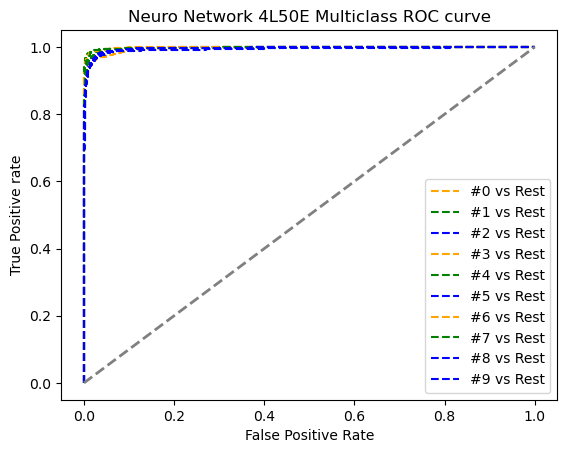

In [38]:
# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
# Convert `y_test` to binary indicator matrix if necessary
from sklearn.preprocessing import label_binarize
y_test_binarized = label_binarize(y_test, classes=range(len(classes)))

# Compute ROC curve for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], probabilities[:, i])



# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label=classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='green', label=classes[4] + ' vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='blue', label=classes[5] + ' vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='orange', label=classes[6] + ' vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='green', label=classes[7] + ' vs Rest')
plt.plot(fpr[8], tpr[8], linestyle='--',color='blue', label=classes[8] + ' vs Rest')
plt.plot(fpr[9], tpr[9], linestyle='--',color='blue', label=classes[9] + ' vs Rest')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.title('Neuro Network 4L50E Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()